# 1. Importing Libraries

In [31]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils

# 2. Creating Directories

In [32]:
# Create a directory "Copy-Brain-MRI" and in that make four folders glioma_tumor, meningioma_tumor, no_tumor, pituitary_tumor

In [33]:
# Create a directory "Test-Data" and in that make four folders glioma_tumor, meningioma_tumor, no_tumor, pituitary_tumor

# 3. Data Visualization

In [34]:
train_dr = "./Brain-MRI/Training/"
test_dr = "./Brain-MRI/Testing/"
classes = os.listdir("./Brain-MRI/Training/")
file_path_dict = {}


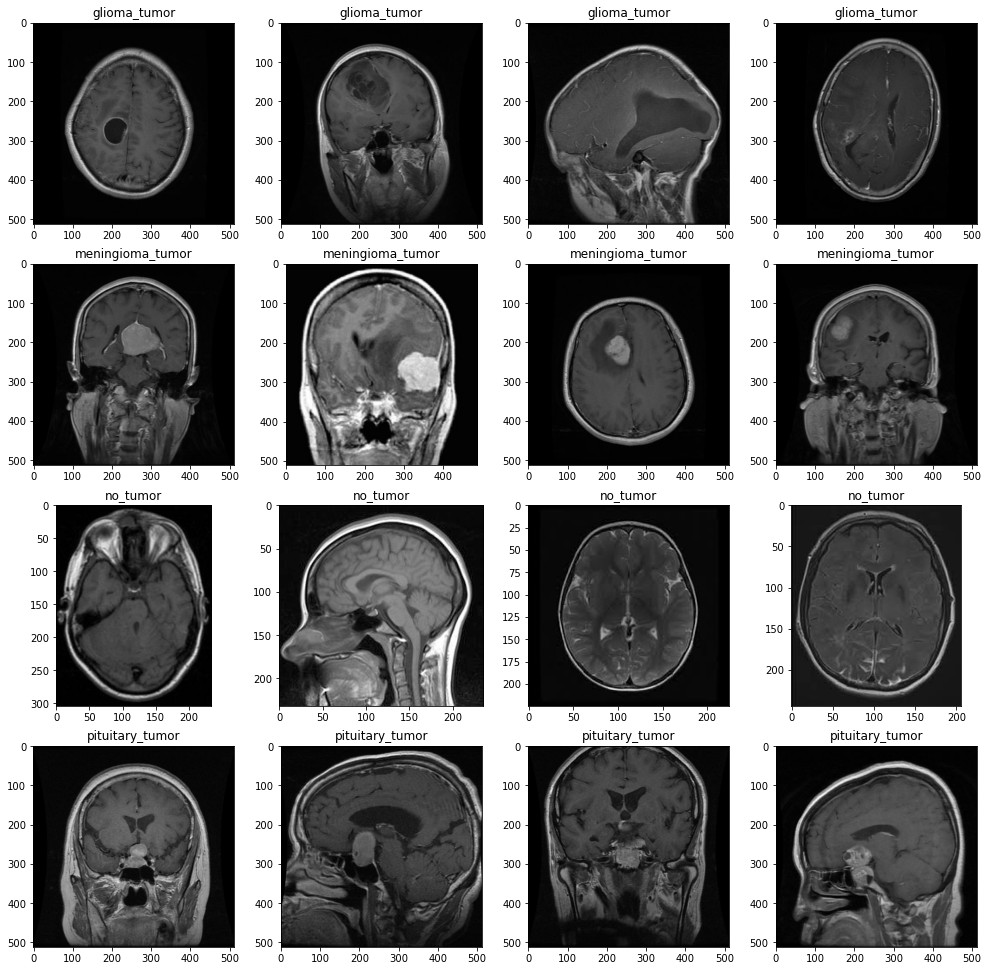

In [35]:
for c in classes:
    file_path_dict[c] = list(map(lambda x: train_dr+c+'/'+x, os.listdir(train_dr+c)))


plt.figure(figsize=(17,17))
index = 0

for c in classes:
    random.shuffle(file_path_dict[c])
    path_list = file_path_dict[c][:5]

    for i in range(1, 5):
        index += 1
        plt.subplot(4,4,index)
        plt.imshow(load_img(path_list[i]))
        plt.title(c)

# 4. Create a function to crop images

In [36]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

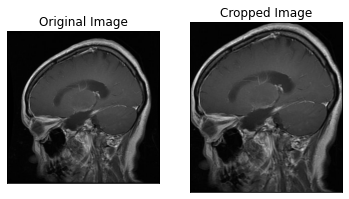

In [37]:
# make sure the file name is gg (102) not gg(102)
example_img = cv2.imread("./Brain-MRI/Training/glioma_tumor/gg (102).jpg")
cropped_img = crop_image(example_img, plot = True)

# 5. Saving the Cropped Images

In [61]:
# Crop the Training Images and Save it to the Directory we previously cretaed

glioma = train_dr + "glioma_tumor"
meningioma = train_dr + "meningioma_tumor"
no_tumor = train_dr + "no_tumor"
pituitary = train_dr + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
    path = os.path.join(glioma, i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        save_path = "./Crop-Brain_MRI/glioma_tumor/" + str(j) + ".jpg"
        cv2.imwrite(save_path, img)
        j = j+1
        
j = 0
for i in tqdm(os.listdir(meningioma)):
    path = os.path.join(meningioma, i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        save_path = "./Crop-Brain_MRI/meningioma_tumor/" + str(j) + ".jpg"
        cv2.imwrite(save_path, img)
        j = j+1
        
j = 0
for i in tqdm(os.listdir(no_tumor)):
    path = os.path.join(no_tumor, i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        save_path = "./Crop-Brain_MRI/no_tumor/" + str(j) + ".jpg"
        cv2.imwrite(save_path, img)
        j = j+1
        
j = 0
for i in tqdm(os.listdir(pituitary)):
    path = os.path.join(pituitary, i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        save_path = "./Crop-Brain_MRI/pituitary_tumor/" + str(j) + ".jpg"
        cv2.imwrite(save_path, img)
        j = j+1

100%|██████████| 901/901 [00:10<00:00, 83.93it/s] 


In [62]:
# Crop the Testing Images and Save it to the Directory we previously created

test_glioma = test_dr + "glioma_tumor"
test_meningioma = test_dr + "meningioma_tumor"
test_no_tumor = test_dr + "no_tumor"
test_pituitary = test_dr + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma, i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        save_path = "./Test-Data/glioma_tumor/" + str(j) + ".jpg"
        cv2.imwrite(save_path, img)
        j = j+1
        
j = 0
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma, i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        save_path = "./Test-Data/meningioma_tumor/" + str(j) + ".jpg"
        cv2.imwrite(save_path, img)
        j = j+1
        
j = 0
for i in tqdm(os.listdir(test_no_tumor)):
    path = os.path.join(test_no_tumor, i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        save_path = "./Test-Data/no_tumor/" + str(j) + ".jpg"
        cv2.imwrite(save_path, img)
        j = j+1
        
j = 0
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary, i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        save_path = "./Test-Data/pituitary_tumor/" + str(j) + ".jpg"
        cv2.imwrite(save_path, img)
        j = j+1

100%|██████████| 5/5 [00:00<00:00, 44.24it/s]


# 6. Data Augmentation and Data Loader

In [63]:
# Use Image Data Generator to perform this task

datagen = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory("./Crop-Brain_MRI/",
                                        target_size = (224, 224),
                                        batch_size= 32,
                                        class_mode= "categorical",
                                        subset= "training")

valid_data = datagen.flow_from_directory("./Crop-Brain_MRI/",
                                        target_size = (224, 224),
                                        batch_size= 32,
                                        class_mode= "categorical",
                                        subset= "validation")

test_datagen = ImageDataGenerator()

test_data = test_datagen.flow_from_directory("./Test-Data/",
                                        target_size = (224, 224),
                                        
                                        class_mode= "categorical"
                                         )

Found 2613 images belonging to 4 classes.
Found 652 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [64]:
# View the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


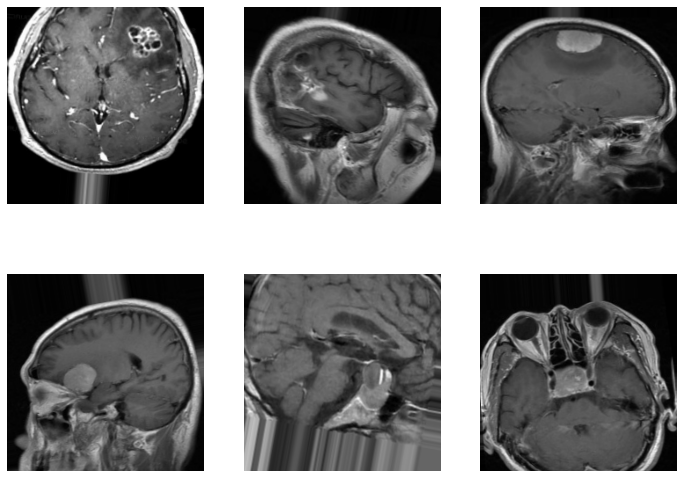

In [65]:
# View the augmented data

sample_x, sample_y = next(train_data)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2, 3, i+1)
    sample = array_to_img(sample_x[i])
    plt.axis('off')
    plt.grid(False)
    plt.imshow(sample)
plt.show()

# 7. Build and Create the Model

In [72]:
# Building the Model

effnet = EfficientNetB1(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= effnet.input, outputs= model)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 224, 224, 3)  7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_3[0][0]            
____________________________________________________________________________________________

block3a_dwconv_pad (ZeroPadding (None, 59, 59, 144)  0           block3a_expand_activation[0][0]  
__________________________________________________________________________________________________
block3a_dwconv (DepthwiseConv2D (None, 28, 28, 144)  3600        block3a_dwconv_pad[0][0]         
__________________________________________________________________________________________________
block3a_bn (BatchNormalization) (None, 28, 28, 144)  576         block3a_dwconv[0][0]             
__________________________________________________________________________________________________
block3a_activation (Activation) (None, 28, 28, 144)  0           block3a_bn[0][0]                 
__________________________________________________________________________________________________
block3a_se_squeeze (GlobalAvera (None, 144)          0           block3a_activation[0][0]         
__________________________________________________________________________________________________
block3a_se

block4c_bn (BatchNormalization) (None, 14, 14, 480)  1920        block4c_dwconv[0][0]             
__________________________________________________________________________________________________
block4c_activation (Activation) (None, 14, 14, 480)  0           block4c_bn[0][0]                 
__________________________________________________________________________________________________
block4c_se_squeeze (GlobalAvera (None, 480)          0           block4c_activation[0][0]         
__________________________________________________________________________________________________
block4c_se_reshape (Reshape)    (None, 1, 1, 480)    0           block4c_se_squeeze[0][0]         
__________________________________________________________________________________________________
block4c_se_reduce (Conv2D)      (None, 1, 1, 20)     9620        block4c_se_reshape[0][0]         
__________________________________________________________________________________________________
block4c_se

block5d_add (Add)               (None, 14, 14, 112)  0           block5d_drop[0][0]               
                                                                 block5c_add[0][0]                
__________________________________________________________________________________________________
block6a_expand_conv (Conv2D)    (None, 14, 14, 672)  75264       block5d_add[0][0]                
__________________________________________________________________________________________________
block6a_expand_bn (BatchNormali (None, 14, 14, 672)  2688        block6a_expand_conv[0][0]        
__________________________________________________________________________________________________
block6a_expand_activation (Acti (None, 14, 14, 672)  0           block6a_expand_bn[0][0]          
__________________________________________________________________________________________________
block6a_dwconv_pad (ZeroPadding (None, 17, 17, 672)  0           block6a_expand_activation[0][0]  
__________

In [74]:
# Compiling the model

model.compile(optimizer=Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy", save_best_only=True, mode="auto", verbose = 1)
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

# 8. Model Training and Model Evaluation

In [78]:
# Train the model
history = model.fit(train_data, epochs=5, validation_data=valid_data, verbose=1, callbacks=[checkpoint, earlystop])

Epoch 1/5
82/82 [==============================] - 1267s 15s/step - loss: 0.2993 - accuracy: 0.9020 - val_loss: 0.5049 - val_accuracy: 0.8021

Epoch 00001: val_accuracy improved from 0.54755 to 0.80215, saving model to model.h5
Epoch 2/5
82/82 [==============================] - 940s 11s/step - loss: 0.1996 - accuracy: 0.9311 - val_loss: 0.3689 - val_accuracy: 0.8666

Epoch 00002: val_accuracy improved from 0.80215 to 0.86656, saving model to model.h5
Epoch 3/5
82/82 [==============================] - 851s 10s/step - loss: 0.1386 - accuracy: 0.9529 - val_loss: 0.3068 - val_accuracy: 0.8880

Epoch 00003: val_accuracy improved from 0.86656 to 0.88804, saving model to model.h5
Epoch 4/5
82/82 [==============================] - 840s 10s/step - loss: 0.1023 - accuracy: 0.9659 - val_loss: 0.2729 - val_accuracy: 0.9018

Epoch 00004: val_accuracy improved from 0.88804 to 0.90184, saving model to model.h5
Epoch 5/5
82/82 [==============================] - 842s 10s/step - loss: 0.0923 - accuracy:

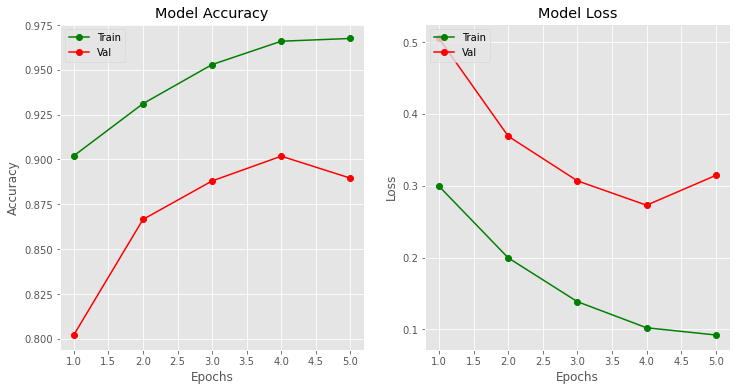

In [81]:
# Plot the training curve

plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,6)
plt.subplot(1, 2,1)
plt.plot(epochs, history.history["accuracy"], "go-")
plt.plot(epochs, history.history["val_accuracy"], "ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"], loc="upper left")

plt.subplot(1, 2,2)
plt.plot(epochs, history.history["loss"], "go-")
plt.plot(epochs, history.history["val_loss"], "ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Val"], loc="upper left")

plt.show()

In [82]:
# Evaluate the model on test set
model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.1154 - accuracy: 0.9500


[0.11542323976755142, 0.949999988079071]

# 9. Obtaining Predictions on Test Images

meningioma_tumor


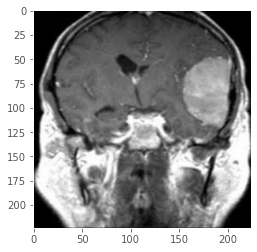

In [86]:
# Obtain Predictions on Test Images

class_dict = {0: "glioma_tumor", 1: "meningioma_tumor", 2: "no_tumor", 3: "pituitary_tumor"}

test_img1 =cv2.imread("./Test-Data/meningioma_tumor/1.jpg")
plt.imshow(test_img1)
plt.grid(False)
test_img1 = np.expand_dims(test_img1, axis=0)
pred = model.predict(test_img1)
pred = np.argmax(pred)
pred_class = class_dict[pred]
print(pred_class)

meningioma_tumor


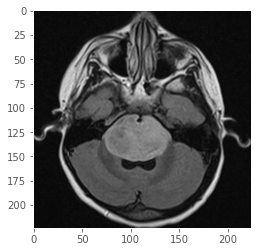

In [89]:
#the test fail here
test_img2 =cv2.imread("./Test-Data/glioma_tumor/1.jpg")
plt.imshow(test_img2)
plt.grid(False)
test_img2 = np.expand_dims(test_img2, axis=0)
pred = model.predict(test_img2)
pred = np.argmax(pred)
pred_class = class_dict[pred]
print(pred_class)

no_tumor


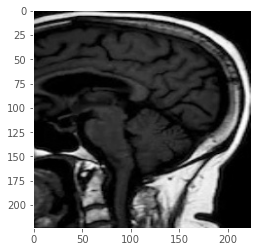

In [90]:
test_img3 =cv2.imread("./Test-Data/no_tumor/1.jpg")
plt.imshow(test_img3)
plt.grid(False)
test_img3 = np.expand_dims(test_img3, axis=0)
pred = model.predict(test_img3)
pred = np.argmax(pred)
pred_class = class_dict[pred]
print(pred_class)

pituitary_tumor


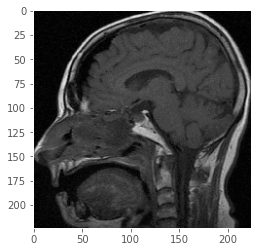

In [91]:
test_img4 =cv2.imread("./Test-Data/pituitary_tumor/1.jpg")
plt.imshow(test_img4)
plt.grid(False)
test_img4 = np.expand_dims(test_img4, axis=0)
pred = model.predict(test_img4)
pred = np.argmax(pred)
pred_class = class_dict[pred]
print(pred_class)